In [421]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
import os
from api_keys import g_key

file_to_load = "../airbnb/AirBnB 2019/calendar_2019.csv"
list_to_load = "../airbnb/AirBnB 2019/listings_2019.csv"

cal_2019 = pd.read_csv(file_to_load)
list_2019 = pd.read_csv(list_to_load, low_memory = False)

file_to_load = "../airbnb/AirBnB 2020/calendar_2020.csv"
cal_2020 = pd.read_csv(file_to_load)

file_to_load = "../airbnb/AirBnB 2020/listings_2020.csv"
list_2020 = pd.read_csv(file_to_load)

In [422]:
list_2019.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

In [423]:
list_2020.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [424]:
list_2019 = list_2019[['id','name','host_response_time','host_response_rate','host_is_superhost',
                           'city','latitude','longitude','property_type','room_type',
                           'accommodates','bathrooms','bedrooms','beds', 'amenities','price',
                           'security_deposit', 'cleaning_fee', 'has_availability',
                           'availability_365', 'number_of_reviews','review_scores_rating',
                           'review_scores_accuracy', 'review_scores_cleanliness',
                           'review_scores_checkin', 'review_scores_communication',
                           'review_scores_location', 'review_scores_value','reviews_per_month']]
list_2019 = list_2019.rename(columns = {'id': 'listing_id'})

In [425]:
list_2020 = list_2020[['id','name','host_response_time','host_response_rate','host_is_superhost',
                       'neighbourhood_cleansed',
                       'latitude','longitude','property_type','room_type',
                       'accommodates','bathrooms','bedrooms','beds', 'amenities','price', 'has_availability',
                       'availability_365', 'number_of_reviews','review_scores_rating',
                       'review_scores_accuracy', 'review_scores_cleanliness',
                       'review_scores_checkin', 'review_scores_communication',
                       'review_scores_location', 'review_scores_value','reviews_per_month']]
list_2020 = list_2020.rename(columns = {'id': 'listing_id','neighbourhood_cleansed':'city'})

In [429]:
neighborhood_count19 = pd.DataFrame(list_2019['city'].value_counts())
neighborhood_count20 = pd.DataFrame(list_2020['city'].value_counts())
neighborhood_count20 = pd.merge(neighborhood_count19, neighborhood_count20, left_index = True, right_index = True, how = 'outer', suffixes = ('_2019','_2020'))
neighborhood_count20 = neighborhood_count20.sort_values(by = 'city_2019', ascending = False)
neighborhood_count20 = neighborhood_count20.rename(columns = {'city_2019': '2019 Listings', 'city_2020': '2020 Listings'})
neighborhood_count20['Change in Listings'] = neighborhood_count20['2020 Listings'] - neighborhood_count20['2019 Listings']
neighborhood_count20.head()

,2019 Listings,2020 Listings,Change in Listings
Melbourne,7368,6174,-1194
Port Phillip,2808,2498,-310
Yarra,2049,1578,-471
Stonnington,1621,1369,-252
Moreland,967,863,-104


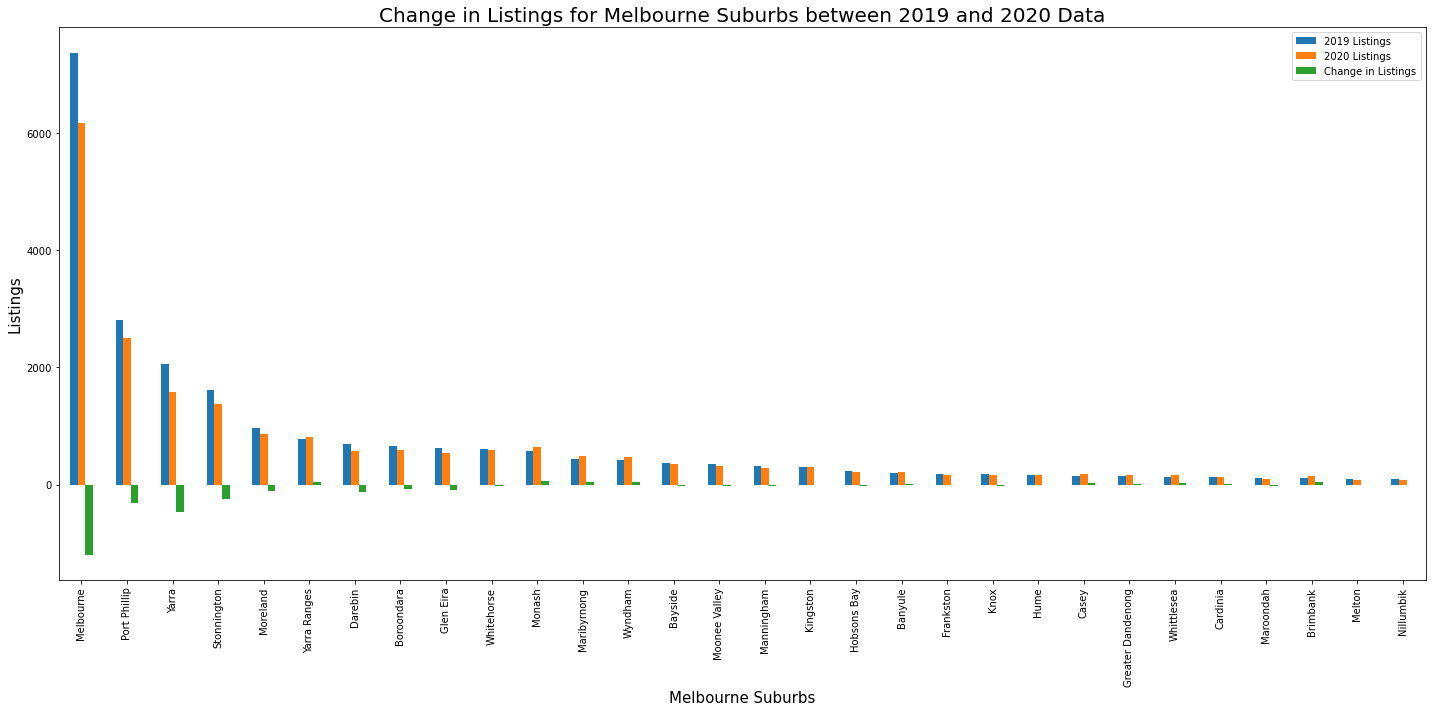

In [430]:
neighborhood_count20.plot(kind = 'bar', y = ['2019 Listings', '2020 Listings', 'Change in Listings'], 
                          align = 'center', figsize = (20,10))
plt.xlabel('Melbourne Suburbs', fontsize = 15)
plt.ylabel('Listings', fontsize = 15)
plt.title('Change in Listings for Melbourne Suburbs between 2019 and 2020 Data', fontsize = 20)
plt.tight_layout()
plt.savefig('listings_bar.png')

# Create below this, dataframe with room type count for each year, then map to bar chart as above showing any differences between 2019 and 2020

# Comparing Days Booked Across Cities

## Of interest here is that Moreland is the highest average days booked across all council areas in 2019.

In [418]:
cal_2020.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
red_cal_2019 = cal_2019[['listing_id','date','available','day','month','year']]
red_cal_2020 = cal_2020[['listing_id','date','available','day','month','year']]
red_list_2019 = list_2019[['listing_id',]]

In [395]:
list_2019 = sum_list_2019
list_2019['Booked_2019'] = 365 - list_2019['availability_365']
neighborhood_book2019 = list_2019.groupby('city').mean()
total_days = pd.DataFrame(neighborhood_book2019['Booked_2019'])
neighborhood_book2019 = list_2019.groupby('city').median()
total_days['Median Days Booked 2019'] = neighborhood_book2019['Booked_2019']


list_2020 = list_2020
list_2020['Booked_2020'] = 365 - list_2020['availability_365']
neighborhood_book20 = list_2020.groupby('neighbourhood_cleansed').mean()
total_days20 = pd.DataFrame(neighborhood_book20['Booked_2020'])
neighborhood_book20 = list_2020.groupby('neighbourhood_cleansed').median()
total_days20['Median Days Booked 2020'] = neighborhood_book20['Booked_2020']
total_days = pd.merge(total_days, total_days20, left_index = True, right_index = True, how = 'outer')
total_days = total_days.sort_values(by = 'Booked_2019', ascending = False)
total_days = total_days.rename(columns = {'Booked_2019': 'Average Days Booked 2019','Booked_2020':'Average Days Booked 2020'})
total_days.head()

,Average Days Booked 2019,Median Days Booked 2019,Average Days Booked 2020,Median Days Booked 2020
city,,,,
Moreland,265.514995,320.0,252.209733,287.0
Yarra,265.232796,327.0,253.365019,341.0
Darebin,259.992837,323.0,256.111111,333.0
Melbourne,242.376629,289.0,231.425656,275.0
Stonnington,239.495373,294.0,235.598977,278.0


# Heatmap of locations in 2019 for nightly price

In [352]:
gmaps.configure(api_key=g_key)
fig2019 = gmaps.figure()
coord2019 = list_2019[['latitude','longitude']]
price = list_2019['price']
heat_layer = gmaps.heatmap_layer(coord2019, weights = price, dissipating = False, max_intensity = max(price), point_radius=0.009)
fig2019.add_layer(heat_layer)
fig2019

Figure(layout=FigureLayout(height='420px'))

# Heatmap of locations in 2020 for nightly price

## Use Sherin's code to remove the dollar sign from the price per night column

list_2020['price'] = list_2020['price'].replace('[\$,]', '', regex=True).astype(float)

In [353]:
gmaps.configure(api_key=g_key)
fig2020 = gmaps.figure()
coord2020 = list_2020[['latitude','longitude']]
list_2020['price'] = list_2020['price'].replace('[\$,]', '', regex=True).astype(float)
price = list_2020['price']
heat_layer = gmaps.heatmap_layer(coord2020, weights = price, dissipating = False, max_intensity = max(price), point_radius=0.009)
fig2020.add_layer(heat_layer)
fig2020

Figure(layout=FigureLayout(height='420px'))

In [349]:
cal_2020['date'] = pd.to_datetime(cal_2020['date'])
cal_2020['day'] = cal_2020['date'].dt.day
cal_2020['month'] = cal_2020['date'].dt.month
cal_2020['year'] = cal_2020['date'].dt.year

cal_2020.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,day,month,year
0,875444,2020-08-20,t,$75.00,$75.00,4.0,1124.0,20,8,2020
1,875444,2020-08-21,t,$81.00,$81.00,4.0,1124.0,21,8,2020
2,875444,2020-08-22,t,$81.00,$81.00,4.0,1124.0,22,8,2020
3,875444,2020-08-23,t,$75.00,$75.00,4.0,1124.0,23,8,2020
4,875444,2020-08-24,t,$75.00,$75.00,4.0,1124.0,24,8,2020


In [400]:
cal_2019['date'] = pd.to_datetime(cal_2019['date'])
cal_2019['day'] = cal_2019['date'].dt.day
cal_2019['month'] = cal_2019['date'].dt.month
cal_2019['year'] = cal_2019['date'].dt.year

cal_2019.head()

,listing_id,date,available,price,day,month,year
0,136510,2019-10-15,f,NaN,15,10,2019
1,136510,2019-10-14,f,NaN,14,10,2019
2,136510,2019-10-13,f,NaN,13,10,2019
3,136510,2019-10-12,f,NaN,12,10,2019
4,136510,2019-10-11,f,NaN,11,10,2019


In [401]:
months = list(cal_2019['month'].unique())
years = list(cal_2019['year'].unique())

In [402]:
rows_list = []
for year in years:
    for month in months:
        month_dict = {}
        df_month = cal_2019.loc[(cal_2019['available'] == 'f') & (cal_2019['month']==month) & (cal_2019['year']==year)]
        
        list_count = df_month['listing_id'].nunique()
        book_nights = df_month['day'].count()
        if list_count > 0:
            month_dict['Year'] = year
            month_dict['Month'] = month
            month_dict['Listings Available'] = list_count
            month_dict['Total of Nightly Bookings'] = book_nights
            rows_list.append(month_dict)
            print(month_dict)
busy_month = pd.DataFrame(rows_list)
busy_month['Percentage Booked'] = (busy_month['Total of Nightly Bookings']/(365 * busy_month['Listings Available']))*100
busy_month = busy_month.sort_values(['Year','Month'],ascending = True)
busy_month

{'Year': 2019, 'Month': 10, 'Listings Available': 16270, 'Total of Nightly Bookings': 496118}
{'Year': 2019, 'Month': 9, 'Listings Available': 16230, 'Total of Nightly Bookings': 479435}
{'Year': 2019, 'Month': 8, 'Listings Available': 15923, 'Total of Nightly Bookings': 482615}
{'Year': 2019, 'Month': 7, 'Listings Available': 15938, 'Total of Nightly Bookings': 483323}
{'Year': 2019, 'Month': 6, 'Listings Available': 16087, 'Total of Nightly Bookings': 455400}
{'Year': 2019, 'Month': 5, 'Listings Available': 13461, 'Total of Nightly Bookings': 394457}
{'Year': 2019, 'Month': 4, 'Listings Available': 14505, 'Total of Nightly Bookings': 391776}
{'Year': 2019, 'Month': 3, 'Listings Available': 16246, 'Total of Nightly Bookings': 401874}
{'Year': 2019, 'Month': 2, 'Listings Available': 14777, 'Total of Nightly Bookings': 317324}
{'Year': 2019, 'Month': 1, 'Listings Available': 18399, 'Total of Nightly Bookings': 397152}
{'Year': 2019, 'Month': 12, 'Listings Available': 16091, 'Total of Ni

,Year,Month,Listings Available,Total of Nightly Bookings,Percentage Booked
12,2018,12,21882,385461,4.826147
9,2019,1,18399,397152,5.913841
8,2019,2,14777,317324,5.883338
7,2019,3,16246,401874,6.777205
6,2019,4,14505,391776,7.399924
5,2019,5,13461,394457,8.028409
4,2019,6,16087,455400,7.755773
3,2019,7,15938,483323,8.308273
2,2019,8,15923,482615,8.303918
1,2019,9,16230,479435,8.093164


In [385]:
months = [8,9,10,11,12,1,2,3,4,5,6,7]
years = [2020, 2021]

In [392]:
monthy = list(cal_2020['month'].unique())
monthy

[8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7]

In [398]:
rows_list = []
for year in years:
    for month in months:
        month_dict = {}
        df_month = cal_2020.loc[(cal_2020['available'] == 'f') & (cal_2020['month']==month) & (cal_2020['year']==year)]
        
        list_count = df_month['listing_id'].nunique()
        book_nights = df_month['day'].count()
        if list_count > 0:
            month_dict['Year'] = year
            month_dict['Month'] = month
            month_dict['Listings Available'] = list_count
            month_dict['Total of Nightly Bookings'] = book_nights
            rows_list.append(month_dict)
            print(month_dict)
busy_month = pd.DataFrame(rows_list)
busy_month['Percentage Booked'] = (busy_month['Total of Nightly Bookings']/(365 * busy_month['Listings Available']))*100
busy_month = busy_month.sort_values(['Year','Month'],ascending = True)
busy_month

{'Year': 2020, 'Month': 8, 'Listings Available': 16296, 'Total of Nightly Bookings': 145076}
{'Year': 2020, 'Month': 9, 'Listings Available': 11811, 'Total of Nightly Bookings': 315348}
{'Year': 2020, 'Month': 10, 'Listings Available': 10617, 'Total of Nightly Bookings': 293605}
{'Year': 2020, 'Month': 11, 'Listings Available': 12441, 'Total of Nightly Bookings': 300793}
{'Year': 2020, 'Month': 12, 'Listings Available': 12451, 'Total of Nightly Bookings': 356013}
{'Year': 2021, 'Month': 8, 'Listings Available': 13969, 'Total of Nightly Bookings': 269730}
{'Year': 2021, 'Month': 1, 'Listings Available': 11857, 'Total of Nightly Bookings': 344269}
{'Year': 2021, 'Month': 2, 'Listings Available': 13898, 'Total of Nightly Bookings': 337879}
{'Year': 2021, 'Month': 3, 'Listings Available': 13904, 'Total of Nightly Bookings': 420969}
{'Year': 2021, 'Month': 4, 'Listings Available': 13776, 'Total of Nightly Bookings': 405684}
{'Year': 2021, 'Month': 5, 'Listings Available': 14144, 'Total of N

,Year,Month,Listings Available,Total of Nightly Bookings,Percentage Booked
0,2020,8,16296,145076,2.439056
1,2020,9,11811,315348,7.314936
2,2020,10,10617,293605,7.576502
3,2020,11,12441,300793,6.623989
4,2020,12,12451,356013,7.833733
6,2021,1,11857,344269,7.954818
7,2021,2,13898,337879,6.660641
8,2021,3,13904,420969,8.295021
9,2021,4,13776,405684,8.068111
10,2021,5,14144,424721,8.226946


In [389]:
df_month = cal_2020.loc[(cal_2020['month']==9)]
df_month['listing_id'].nunique()

20420

In [35]:
days_cost = pd.merge(cal_2019, list_2019_price, on = 'listing_id', how = 'left')
daily_price_2019 = days_cost.groupby('listing_id').mean()
daily_price_2019.describe()

,day,month,year,price_y
count,22895.000000,2.289500e+04,22895.000000,22895.000000
mean,15.720548,6.526027e+00,2018.931509,148.004368
std,0.000000,8.881978e-16,0.000070,210.883253
min,15.720548,6.526027e+00,2018.931507,0.000000
25%,15.720548,6.526027e+00,2018.931507,71.000000
50%,15.720548,6.526027e+00,2018.931507,111.000000
75%,15.720548,6.526027e+00,2018.931507,165.000000
max,15.720548,6.526027e+00,2018.934247,12624.000000


In [29]:
#Finding all available booking ID's and total days available
avail_2019 = cal_2019.loc[cal_2018['available'] == 't']
avail_2019 = avail_2019.groupby('listing_id').count()
avail_2019 = pd.merge(avail_2019, list_2019_price, on = 'listing_id', how = 'left')
avail_2019 = avail_2019.rename(columns = {'available':'Number of Days Available',
                                          'price_y': 'Price per Night'})
avail_2019 = avail_2019[['listing_id','Number of Days Available','Price per Night']]
avail_2019

,listing_id,Number of Days Available,Price per Night
0,9835,365,60
1,10803,213,35
2,12936,326,159
3,16760,328,69
4,38271,328,98
...,...,...,...
17392,30592332,82,55
17393,30592345,365,129
17394,30592362,15,53
17395,30592590,349,130


In [30]:
#Finding all booked listing_id's and number of days booked
booked_2019 = cal_2019.loc[cal_2019['available'] == 'f']
booked_2019 = booked_2019.groupby('listing_id').count()
booked_2019 = pd.merge(booked_2019, list_2019_price, on = 'listing_id', how = 'left')
booked_2019 = booked_2019.rename(columns = {'available':'Number of Days Booked',
                                          'price_y': 'Price per Night'})
booked_2019 = booked_2019[['listing_id','Number of Days Booked','Price per Night']]
booked_2019

,listing_id,Number of Days Booked,Price per Night
0,10803,152,35
1,12936,39,159
2,15246,365,50
3,16760,37,69
4,38271,37,98
...,...,...,...
22326,30592128,336,30
22327,30592332,283,55
22328,30592362,350,53
22329,30592590,16,130


In [31]:
cal_group = days_cost.groupby(['listing_id','available']).count()

cal_group

date  price_x  price_y
listing_id available                        
9835       t           365      365      365
10803      f           152        0      152
           t           213      213      213
12936      f            39        0       39
           t           326      326      326
...                    ...      ...      ...
30592362   t            15       15       15
30592590   f            16        0       16
           t           349      349      349
30593623   f           297        0      297
           t            68       68       68

[39728 rows x 3 columns]

In [32]:
cal_2019['date'] = pd.to_datetime(cal_2019['date'])
cal_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8356675 entries, 0 to 8356674
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 255.0+ MB


In [33]:
cal_2019['day'] = cal_2019['date'].dt.day
cal_2019['month'] = cal_2019['date'].dt.month
cal_2019['year'] = cal_2019['date'].dt.year

In [34]:
month_2019 = cal_2019.groupby(['year','month']).count()
month_2019

listing_id    date  available   price     day
year month                                               
2018 12         572360  572360     572360  186899  572360
2019 1          709745  709745     709745  312593  709745
     2          641060  641060     641060  323736  641060
     3          709745  709745     709745  307871  709745
     4          686850  686850     686850  295074  686850
     5          709745  709745     709745  315288  709745
     6          686850  686850     686850  231450  686850
     7          709745  709745     709745  226422  709745
     8          709745  709745     709745  227130  709745
     9          686850  686850     686850  207415  686850
     10         709745  709745     709745  213627  709745
     11         686850  686850     686850  205241  686850
     12         137385  137385     137385   41446  137385